In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

c:\Users\ahmad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ahmad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ahmad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Questions

- Profit = cash - taxes (0.14)
- Analyize all sales profit
- What is the profit for each weekday
- What is the profit from each city

In [2]:
df = pd.read_csv('Sales.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700$,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0$,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95$,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99$,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95$,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95$,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84$,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400$,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99$,12/03/19 10:39,"778 River St, Dallas, TX 75001"


## 1. Distungish features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          25037 non-null  object
 1   Product           25037 non-null  object
 2   Quantity Ordered  25037 non-null  object
 3   Price Each        25117 non-null  object
 4   Order Date        25037 non-null  object
 5   Purchase Address  25037 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


## 2. Data cleaning

**Problems**

- Numerical
    - Quantity Ordered is not numerical
    - Price Each not numerical
- Categorical
    - Product columns has 'Product' value 

In [4]:
for v in df['Quantity Ordered'].unique():
    print(v)

1
2
4
3
Quantity Ordered
nan
7
5
6


In [5]:
def fix_qty(qty_str):
    try:
        return int(qty_str)
    except:
        return np.nan
        

df['Quantity Ordered'] = df['Quantity Ordered'].apply(fix_qty)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          25037 non-null  object 
 1   Product           25037 non-null  object 
 2   Quantity Ordered  24989 non-null  float64
 3   Price Each        25117 non-null  object 
 4   Order Date        25037 non-null  object 
 5   Purchase Address  25037 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [6]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700$,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.0$,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1.0,11.95$,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1.0,149.99$,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1.0,11.95$,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95$,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2.0,3.84$,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1.0,400$,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1.0,11.99$,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [6]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300$,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
648,NaN,NaN,NaN,nan$,NaN,NaN
680,NaN,NaN,NaN,nan$,NaN,NaN
705,Order ID,Product,Quantity Ordered,Price Each$,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each$,Order Date,Purchase Address
...,...,...,...,...,...,...
23748,Order ID,Product,Quantity Ordered,Price Each$,Order Date,Purchase Address
23996,NaN,NaN,NaN,nan$,NaN,NaN
24192,Order ID,Product,Quantity Ordered,Price Each$,Order Date,Purchase Address
24222,Order ID,Product,Quantity Ordered,Price Each$,Order Date,Purchase Address


In [8]:
df[df['Order ID'] == '296081']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
439,296081,Flatscreen TV,1,300$,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
440,296081,Flatscreen TV,1,300$,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"


In [13]:
to_drop = df[df['Order Date'] == 'Order Date'].index
df.drop(to_drop, inplace=True)

In [15]:
df[df['Price Each'] == 'Price Each$']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
df.duplicated(subset= 'Order ID').sum()

1062

In [19]:
df[df.duplicated(subset= 'Order ID')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17,295681,USB-C Charging Cable,1,11.95$,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
18,295681,Bose SoundSport Headphones,1,99.99$,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
19,295681,Wired Headphones,1,11.99$,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
37,295698,USB-C Charging Cable,2,11.95$,12/13/19 14:32,"175 1st St, New York City, NY 10001"
43,295703,Bose SoundSport Headphones,1,99.99$,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301"
...,...,...,...,...,...,...
24978,319536,Wired Headphones,1,11.99$,12/16/19 09:59,"346 Elm St, Seattle, WA 98101"
24999,319556,Wired Headphones,1,11.99$,12/22/19 08:23,"848 7th St, Austin, TX 73301"
25028,319584,Wired Headphones,1,11.99$,12/11/19 00:30,"537 Sunset St, Portland, OR 97035"
25041,319596,Lightning Charging Cable,1,14.95$,12/01/19 08:44,"436 14th St, New York City, NY 10001"


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(24950, 6)

In [23]:
df.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          0
Order Date          1
Purchase Address    1
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24949 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          24949 non-null  object
 1   Product           24949 non-null  object
 2   Quantity Ordered  24949 non-null  object
 3   Price Each        24949 non-null  object
 4   Order Date        24949 non-null  object
 5   Purchase Address  24949 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


# Product

In [27]:
df.Product.unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

# Quantity Ordered

In [29]:
df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', '7', '5', '6'], dtype=object)

In [37]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')

In [31]:
df['Quantity Ordered'].unique()

array([1, 2, 4, 3, 7, 5, 6])

## Price Each

In [32]:
for v in df['Price Each'].unique():
    print(v)

1700$
600.0$
11.95$
149.99$
3.84$
99.99$
2.99$
999.99$
14.95$
600$
11.99$
150$
400$
700$
109.99$
379.99$
300$
389.99$


In [33]:
def fix_price_each(price_str):
    return float(price_str[:-1])

In [34]:
df['Price Each'] = df['Price Each'].apply(fix_price_each)

In [36]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Order Date

In [38]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [39]:
df['Order Date'].isna().sum()

0

In [40]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16445,311386,iPhone,1,700.00,2020-01-01 00:10:00,"730 Pine St, San Francisco, CA 94016"
12428,307525,27in 4K Gaming Monitor,1,389.99,2019-12-13 06:32:00,"113 Spruce St, Boston, MA 02215"
1922,297489,AAA Batteries (4-pack),1,2.99,2019-12-16 13:56:00,"470 2nd St, New York City, NY 10001"


In [53]:
df['order_year'] = df['Order Date'].dt.year
df['order_month'] = df['Order Date'].dt.month
df['order_day'] = df['Order Date'].dt.day_name()

In [54]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_year,order_month,order_day
17808,312682,AA Batteries (4-pack),1,3.84,2019-12-02 17:34:00,"267 Pine St, Boston, MA 02215",2019,12,Monday
4352,299803,USB-C Charging Cable,1,11.95,2019-12-07 19:32:00,"744 Walnut St, San Francisco, CA 94016",2019,12,Saturday
13360,308414,Bose SoundSport Headphones,1,99.99,2019-12-05 13:19:00,"879 Jackson St, Boston, MA 02215",2019,12,Thursday


In [55]:
df.describe()

,Quantity Ordered,Price Each,order_year,order_month
count,24949.000000,24949.000000,24949.000000,24949.000000
mean,1.125536,183.934078,2019.001363,11.985009
std,0.445742,333.209044,0.036891,0.405806
min,1.000000,2.990000,2019.000000,1.000000
25%,1.000000,11.950000,2019.000000,12.000000
50%,1.000000,14.950000,2019.000000,12.000000
75%,1.000000,150.000000,2019.000000,12.000000
max,7.000000,1700.000000,2020.000000,12.000000


In [56]:
df.shape

(24949, 9)

# Purchase Address

In [62]:
# Extract City 
# s= '267 Pine St, Boston, MA 02215'
# s.split(',')[1].strip()

df['city']= df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [64]:
df['purchase_data_type'] = df['Purchase Address'].apply(lambda x: True if type(x) == str else False)

In [65]:
df['purchase_data_type'].value_counts()

True    24949
Name: purchase_data_type, dtype: int64

In [66]:
df[df['purchase_data_type'] == False]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_year,order_month,order_day,city,purchase_data_type


In [63]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_year,order_month,order_day,city
561,296197,20in Monitor,1,109.99,2019-12-19 19:25:00,"202 Washington St, New York City, NY 10001",2019,12,Thursday,New York City
10062,305261,AA Batteries (4-pack),1,3.84,2019-12-17 16:04:00,"44 South St, Dallas, TX 75001",2019,12,Tuesday,Dallas
8277,303554,Apple Airpods Headphones,1,150.00,2019-12-13 08:26:00,"363 Chestnut St, San Francisco, CA 94016",2019,12,Friday,San Francisco


In [70]:
cols = df.columns.tolist()
cols

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'order_year',
 'order_month',
 'order_day',
 'city',
 'purchase_data_type']

In [71]:
df['Profit'] = (1 - 0.14) * (df['Quantity Ordered'] * df['Price Each'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24949 entries, 0 to 25116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            24949 non-null  object        
 1   Product             24949 non-null  object        
 2   Quantity Ordered    24949 non-null  int32         
 3   Price Each          24949 non-null  float64       
 4   Order Date          24949 non-null  datetime64[ns]
 5   Purchase Address    24949 non-null  object        
 6   order_year          24949 non-null  int64         
 7   order_month         24949 non-null  int64         
 8   order_day           24949 non-null  object        
 9   city                24949 non-null  object        
 10  purchase_data_type  24949 non-null  bool          
 11  Profit              24949 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 2.2+ MB


In [75]:
import plotly.express as px
for col in ['Quantity Ordered', 'Price Each', 'Profit']:
    px.box(df, x=col).show()

In [78]:
df2 = df[df['Price Each'] < 300]

In [79]:
for col in ['Quantity Ordered', 'Price Each', 'Profit']:
    px.box(df2, x=col).show()

In [80]:
df[df['Price Each'] >= 300].shape

(5620, 12)

# Handle Outliers

In [ ]:
# First Method
def handle_outlier(df,col, p1=0.25, p2=0.75):
    q1 = df[col].quantile(p1)
    q3 = df[col].quantile(p2)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df2 = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [81]:
df.describe()

,Quantity Ordered,Price Each,order_year,order_month,Profit
count,24949.000000,24949.000000,24949.000000,24949.000000,24949.000000
mean,1.125536,183.934078,2019.001363,11.985009,159.051207
std,0.445742,333.209044,0.036891,0.405806,286.406320
min,1.000000,2.990000,2019.000000,1.000000,2.571400
25%,1.000000,11.950000,2019.000000,12.000000,10.277000
50%,1.000000,14.950000,2019.000000,12.000000,12.857000
75%,1.000000,150.000000,2019.000000,12.000000,129.000000
max,7.000000,1700.000000,2020.000000,12.000000,1462.000000


In [82]:
df['Quantity Ordered'].quantile([0.8,0.9,0.95,0.99])

0.80    1.0
0.90    1.0
0.95    2.0
0.99    3.0
Name: Quantity Ordered, dtype: float64

In [86]:
df['Quantity Ordered'].value_counts(normalize=True)*100

1    90.588801
2     7.186661
3     1.591246
4     0.436891
5     0.120245
6     0.064131
7     0.012025
Name: Quantity Ordered, dtype: float64

In [83]:
threshold = df['Quantity Ordered'].quantile(0.99)
df[df['Quantity Ordered'] < threshold]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_year,order_month,order_day,city,purchase_data_type,Profit
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,Monday,New York City,True,1462.0000
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019,12,Sunday,New York City,True,516.0000
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019,12,Thursday,New York City,True,10.2770
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019,12,Sunday,San Francisco,True,128.9914
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019,12,Wednesday,Atlanta,True,10.2770
...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019,12,Wednesday,San Francisco,True,12.8570
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019,12,Sunday,Los Angeles,True,6.6048
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019,12,Monday,Seattle,True,344.0000
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019,12,Tuesday,Dallas,True,10.3114


In [72]:
# !pip install datasist

In [24]:
# from datasist.structdata import detect_outliers

In [25]:
# idx = detect_outliers(df, 0, ['Price Each', 'Quantity Ordered'])
# outliers = df.loc[idx]
# clean = df.drop(idx, axis=0)

In [89]:
px.box(df, x='Profit').show()

In [90]:
df.Profit.describe()

count    24949.000000
mean       159.051207
std        286.406320
min          2.571400
25%         10.277000
50%         12.857000
75%        129.000000
max       1462.000000
Name: Profit, dtype: float64

In [91]:
df[df.Profit  == df.Profit.max()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_year,order_month,order_day,city,purchase_data_type,Profit
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019,12,Monday,New York City,True,1462.0
52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10 20:02:00,"331 Madison St, New York City, NY 10001",2019,12,Tuesday,New York City,True,1462.0
57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25 09:51:00,"82 10th St, San Francisco, CA 94016",2019,12,Wednesday,San Francisco,True,1462.0
223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28 11:19:00,"661 Park St, Dallas, TX 75001",2019,12,Saturday,Dallas,True,1462.0
304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17 21:08:00,"863 West St, San Francisco, CA 94016",2019,12,Tuesday,San Francisco,True,1462.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25013,319570,Macbook Pro Laptop,1,1700.0,2019-12-09 17:40:00,"57 13th St, Boston, MA 02215",2019,12,Monday,Boston,True,1462.0
25052,319607,Macbook Pro Laptop,1,1700.0,2019-12-25 20:07:00,"620 Church St, Atlanta, GA 30301",2019,12,Wednesday,Atlanta,True,1462.0
25067,319622,Macbook Pro Laptop,1,1700.0,2019-12-15 07:11:00,"180 Ridge St, Boston, MA 02215",2019,12,Sunday,Boston,True,1462.0
25085,319639,Macbook Pro Laptop,1,1700.0,2019-12-20 10:56:00,"616 Highland St, Seattle, WA 98101",2019,12,Friday,Seattle,True,1462.0


In [92]:
df[df.Profit < df.Profit.max()].describe()

,Quantity Ordered,Price Each,order_year,order_month,Profit
count,24305.000000,24305.000000,24305.000000,24305.000000,24305.000000
mean,1.128862,143.763477,2019.001358,11.985065,124.527486
std,0.451134,226.831946,0.036823,0.405057,195.001850
min,1.000000,2.990000,2019.000000,1.000000,2.571400
25%,1.000000,11.950000,2019.000000,12.000000,10.277000
50%,1.000000,14.950000,2019.000000,12.000000,12.857000
75%,1.000000,150.000000,2019.000000,12.000000,129.000000
max,7.000000,999.990000,2020.000000,12.000000,1032.000000


In [95]:
df[(df['Price Each'] < 1000) & (df['Price Each'] > 700)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_year,order_month,order_day,city,purchase_data_type,Profit
11,295676,ThinkPad Laptop,1,999.99,2019-12-28 17:19:00,"410 Lincoln St, Los Angeles, CA 90001",2019,12,Saturday,Los Angeles,True,859.9914
35,295697,ThinkPad Laptop,1,999.99,2019-12-15 07:38:00,"742 River St, San Francisco, CA 94016",2019,12,Sunday,San Francisco,True,859.9914
204,295852,ThinkPad Laptop,1,999.99,2019-12-24 20:52:00,"639 Sunset St, Los Angeles, CA 90001",2019,12,Tuesday,Los Angeles,True,859.9914
242,295890,ThinkPad Laptop,1,999.99,2019-12-05 11:59:00,"254 Elm St, San Francisco, CA 94016",2019,12,Thursday,San Francisco,True,859.9914
297,295941,ThinkPad Laptop,1,999.99,2019-12-31 16:24:00,"64 Dogwood St, Portland, OR 97035",2019,12,Tuesday,Portland,True,859.9914
...,...,...,...,...,...,...,...,...,...,...,...,...
24902,319463,ThinkPad Laptop,1,999.99,2019-12-30 20:38:00,"513 Spruce St, New York City, NY 10001",2019,12,Monday,New York City,True,859.9914
24942,319503,ThinkPad Laptop,1,999.99,2019-12-28 00:49:00,"148 Pine St, San Francisco, CA 94016",2019,12,Saturday,San Francisco,True,859.9914
25039,319595,ThinkPad Laptop,1,999.99,2019-12-31 22:38:00,"788 6th St, San Francisco, CA 94016",2019,12,Tuesday,San Francisco,True,859.9914
25049,319604,ThinkPad Laptop,1,999.99,2019-12-13 01:30:00,"474 12th St, San Francisco, CA 94016",2019,12,Friday,San Francisco,True,859.9914


In [36]:
df.groupby('City').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Atlanta,1986.0,155.936417,279.487549,2.5714,10.277,12.857,129.0,1462.0
Austin,1347.0,149.280600,263.737717,2.5714,10.277,12.857,129.0,1462.0
Boston,2695.0,162.971525,288.810207,2.5714,10.277,12.857,129.0,1462.0
Dallas,2004.0,164.091879,291.101034,2.5714,10.277,12.857,129.0,1462.0
Los Angeles,3887.0,150.927911,271.654024,2.5714,10.277,12.857,129.0,1462.0
New York City,3405.0,163.507476,292.205229,2.5714,10.277,12.857,129.0,1462.0
Portland,1645.0,158.726347,295.086393,2.5714,10.277,12.857,129.0,1462.0
San Francisco,6006.0,158.637020,289.681308,2.5714,10.277,12.857,129.0,1462.0
Seattle,1974.0,168.222361,300.457807,2.5714,10.277,12.857,129.0,1462.0


In [97]:
df.groupby('city')['Profit'].agg(['mean', 'median', 'sum', 'count'])

,mean,median,sum,count
city,,,,
Atlanta,155.936417,12.857,309689.7238,1986
Austin,149.280600,12.857,201080.9688,1347
Boston,162.971525,12.857,439208.2608,2695
Dallas,164.091879,12.857,328840.1264,2004
Los Angeles,150.927911,12.857,586656.7916,3887
New York City,163.507476,12.857,556742.9558,3405
Portland,158.726347,12.857,261104.8408,1645
San Francisco,158.637020,12.857,952773.9448,6006
Seattle,168.222361,12.857,332070.9400,1974


In [99]:
df.groupby('city')['Profit'].agg(['mean']).sort_values('mean', ascending=False)

,mean
city,
Seattle,168.222361
Dallas,164.091879
New York City,163.507476
Boston,162.971525
Portland,158.726347
San Francisco,158.637020
Atlanta,155.936417
Los Angeles,150.927911
Austin,149.280600


In [103]:
pd.options.display.float_format = '{:,.0f}'.format
df.groupby('city')['Profit'].agg(['sum']).sort_values('sum', ascending=False)

,sum
city,
San Francisco,"952,774"
Los Angeles,"586,657"
New York City,"556,743"
Boston,"439,208"
Seattle,"332,071"
Dallas,"328,840"
Atlanta,"309,690"
Portland,"261,105"
Austin,"201,081"


In [105]:
df.groupby('order_day')['Profit'].agg(['sum']).sort_values('sum', ascending=False)

,sum
order_day,
Monday,"656,220"
Tuesday,"642,400"
Sunday,"630,950"
Wednesday,"540,495"
Friday,"508,656"
Thursday,"499,567"
Saturday,"489,883"


<Axes: xlabel='Profit', ylabel='City'>

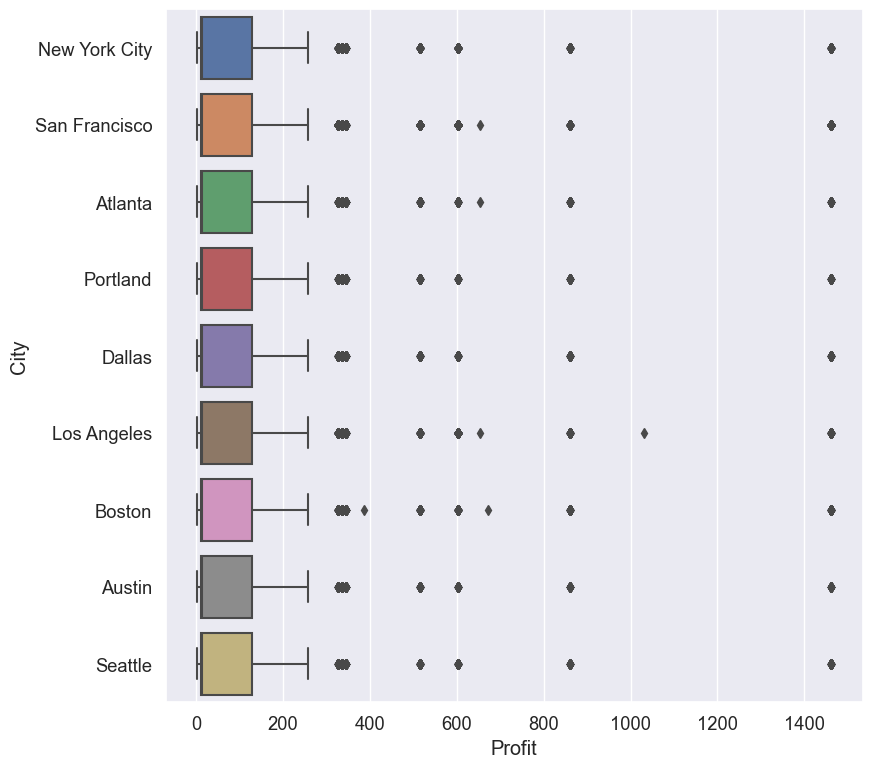

In [37]:
sns.boxplot(x='Profit', y='City', data=df)

In [38]:
df.groupby('City').sum()['Profit'].sort_values()

City
Austin           201080.9688
Portland         261104.8408
Atlanta          309689.7238
Dallas           328840.1264
Seattle          332070.9400
Boston           439208.2608
New York City    556742.9558
Los Angeles      586656.7916
San Francisco    952773.9448
Name: Profit, dtype: float64

<Axes: xlabel='City', ylabel='Profit'>

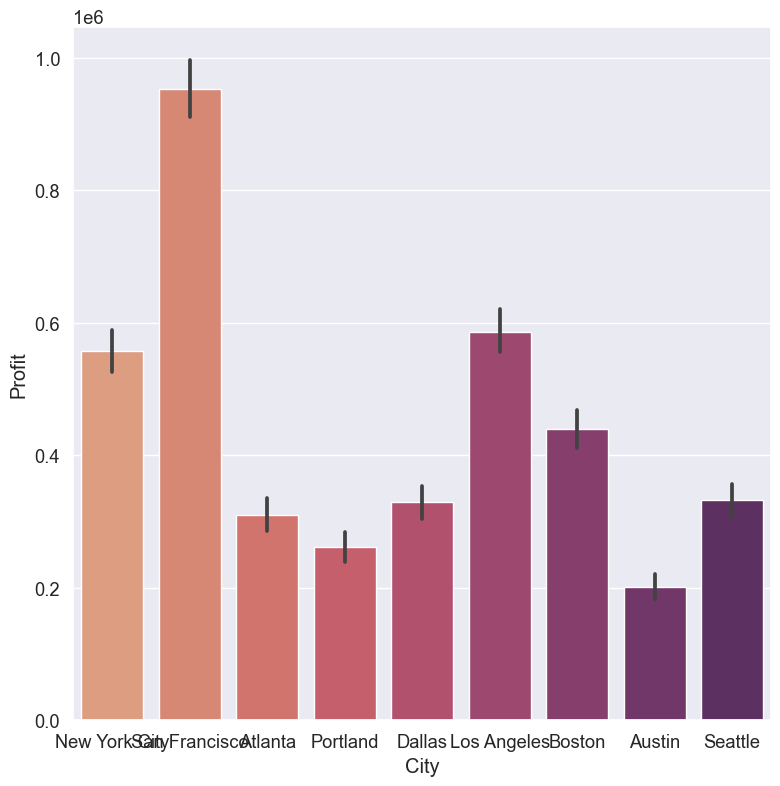

In [39]:
sns.barplot(x='City', y='Profit', estimator=np.sum, data=df, palette='flare')

In [40]:
df.groupby('Weekday').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
Friday,3253.0,156.365092,279.925139,2.5714,10.277,12.857,129.0,1462.0
Monday,4068.0,161.312585,291.449124,2.5714,10.277,12.857,129.0,1462.0
Saturday,3166.0,154.732363,284.895012,2.5714,10.277,12.857,129.0,1462.0
Sunday,3976.0,158.689568,288.350740,2.5714,10.277,12.857,129.0,1462.0
Thursday,3239.0,154.234808,277.236734,2.5714,10.277,12.857,129.0,1462.0
Tuesday,4008.0,160.279365,287.206135,2.5714,10.277,12.857,129.0,1462.0
Wednesday,3239.0,166.870853,293.532301,2.5714,10.277,12.857,129.0,1462.0


<Axes: xlabel='Profit', ylabel='Weekday'>

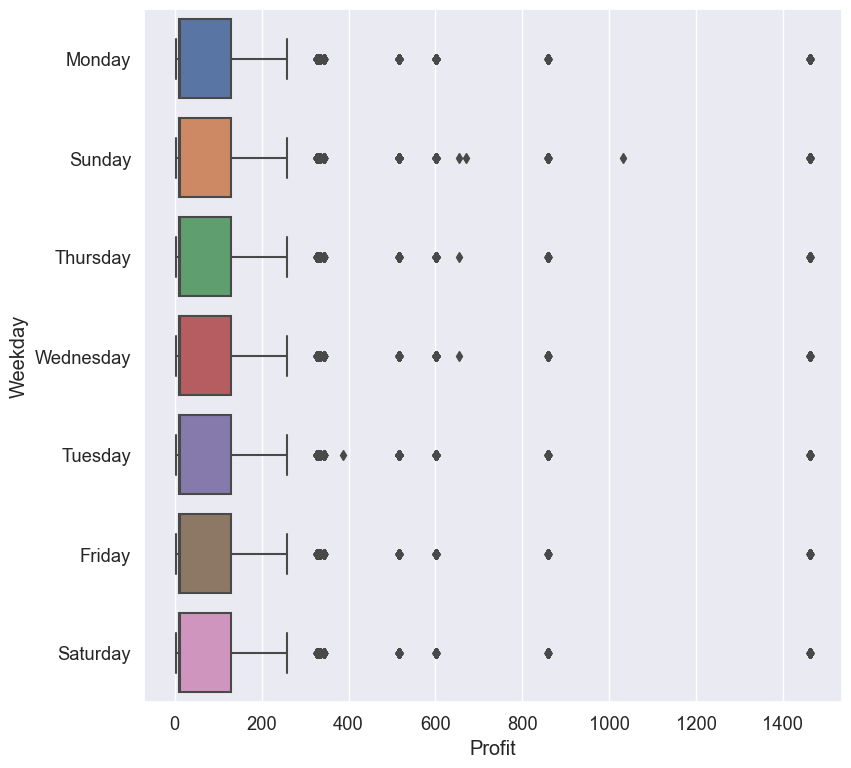

In [41]:
sns.boxplot(x='Profit', y='Weekday', data=df)

In [42]:
df.groupby('Weekday').sum()['Profit'].sort_values()

Weekday
Saturday     489882.6600
Thursday     499566.5438
Friday       508655.6430
Wednesday    540494.6920
Sunday       630949.7242
Tuesday      642399.6954
Monday       656219.5944
Name: Profit, dtype: float64

<Axes: xlabel='Weekday', ylabel='Profit'>

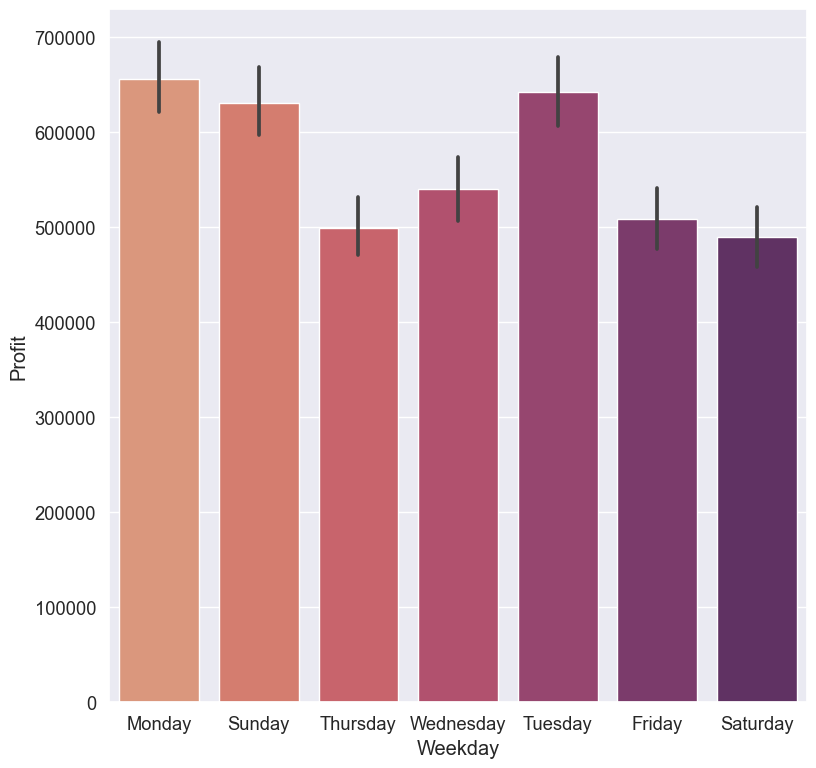

In [43]:
sns.barplot(x='Weekday', y='Profit', estimator=np.sum, data=df, palette='flare')

In [44]:
df.sort_values('Profit', ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profit,City,Weekday
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1462.0000,New York City,Monday
6602,301962,Macbook Pro Laptop,1.0,1700.00,2019-12-03 18:10:00,"707 Hickory St, San Francisco, CA 94016",1462.0000,San Francisco,Tuesday
11728,306850,Macbook Pro Laptop,1.0,1700.00,2019-12-19 21:07:00,"160 14th St, New York City, NY 10001",1462.0000,New York City,Thursday
22847,317489,Macbook Pro Laptop,1.0,1700.00,2019-12-28 13:59:00,"936 Hill St, San Francisco, CA 94016",1462.0000,San Francisco,Saturday
3002,298531,Macbook Pro Laptop,1.0,1700.00,2019-12-04 19:16:00,"344 Adams St, San Francisco, CA 94016",1462.0000,San Francisco,Wednesday
...,...,...,...,...,...,...,...,...,...
15738,310703,AAA Batteries (4-pack),1.0,2.99,2019-12-18 17:02:00,"628 Spruce St, San Francisco, CA 94016",2.5714,San Francisco,Wednesday
21235,315951,AAA Batteries (4-pack),1.0,2.99,2019-12-20 11:52:00,"598 Wilson St, San Francisco, CA 94016",2.5714,San Francisco,Friday
4934,300356,AAA Batteries (4-pack),1.0,2.99,2019-12-30 18:27:00,"15 Jefferson St, Portland, OR 97035",2.5714,Portland,Monday
12927,308004,AAA Batteries (4-pack),1.0,2.99,2019-12-20 17:33:00,"417 Chestnut St, San Francisco, CA 94016",2.5714,San Francisco,Friday


In [45]:
sales = df[  df['Product'] == 'ThinkPad Laptop'  ]
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Profit,City,Weekday
11,295676,ThinkPad Laptop,1.0,999.99,2019-12-28 17:19:00,"410 Lincoln St, Los Angeles, CA 90001",859.9914,Los Angeles,Saturday
35,295697,ThinkPad Laptop,1.0,999.99,2019-12-15 07:38:00,"742 River St, San Francisco, CA 94016",859.9914,San Francisco,Sunday
204,295852,ThinkPad Laptop,1.0,999.99,2019-12-24 20:52:00,"639 Sunset St, Los Angeles, CA 90001",859.9914,Los Angeles,Tuesday
242,295890,ThinkPad Laptop,1.0,999.99,2019-12-05 11:59:00,"254 Elm St, San Francisco, CA 94016",859.9914,San Francisco,Thursday
297,295941,ThinkPad Laptop,1.0,999.99,2019-12-31 16:24:00,"64 Dogwood St, Portland, OR 97035",859.9914,Portland,Tuesday
...,...,...,...,...,...,...,...,...,...
24902,319463,ThinkPad Laptop,1.0,999.99,2019-12-30 20:38:00,"513 Spruce St, New York City, NY 10001",859.9914,New York City,Monday
24942,319503,ThinkPad Laptop,1.0,999.99,2019-12-28 00:49:00,"148 Pine St, San Francisco, CA 94016",859.9914,San Francisco,Saturday
25039,319595,ThinkPad Laptop,1.0,999.99,2019-12-31 22:38:00,"788 6th St, San Francisco, CA 94016",859.9914,San Francisco,Tuesday
25049,319604,ThinkPad Laptop,1.0,999.99,2019-12-13 01:30:00,"474 12th St, San Francisco, CA 94016",859.9914,San Francisco,Friday


In [106]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2019-12-01 02:50:00'), Timestamp('2020-01-01 05:13:00'))